In [2]:
#importing the necessary libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Getting the data
import yfinance as yf
data = yf.download("AAPL", start="2012-01-01", end="2020-01-01")
#show the daa
print(data.head())
print(data.columns)

C:\Users\byron\AppData\Local\Temp\ipykernel_10336\872165145.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2012-01-01", end="2020-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2012-01-03  12.345174  12.383300  12.278229  12.290238  302220800
2012-01-04  12.411520  12.448746  12.286637  12.308251  260022000
2012-01-05  12.549306  12.564916  12.388398  12.456844  271269600
2012-01-06  12.680497  12.691004  12.585033  12.601544  318292800
2012-01-09  12.660386  12.841107  12.648978  12.773563  394024400
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [4]:
# Select the Close column for AAPL and reshape for scaler
dataset = data[('Close', 'AAPL')].values.reshape(-1,1)

print(dataset.shape)  # should be (2012, 1)
print(dataset[:5])  

(2012, 1)
[[12.34517384]
 [12.41152   ]
 [12.54930592]
 [12.68049717]
 [12.66038609]]


In [5]:
data.shape

(2012, 5)

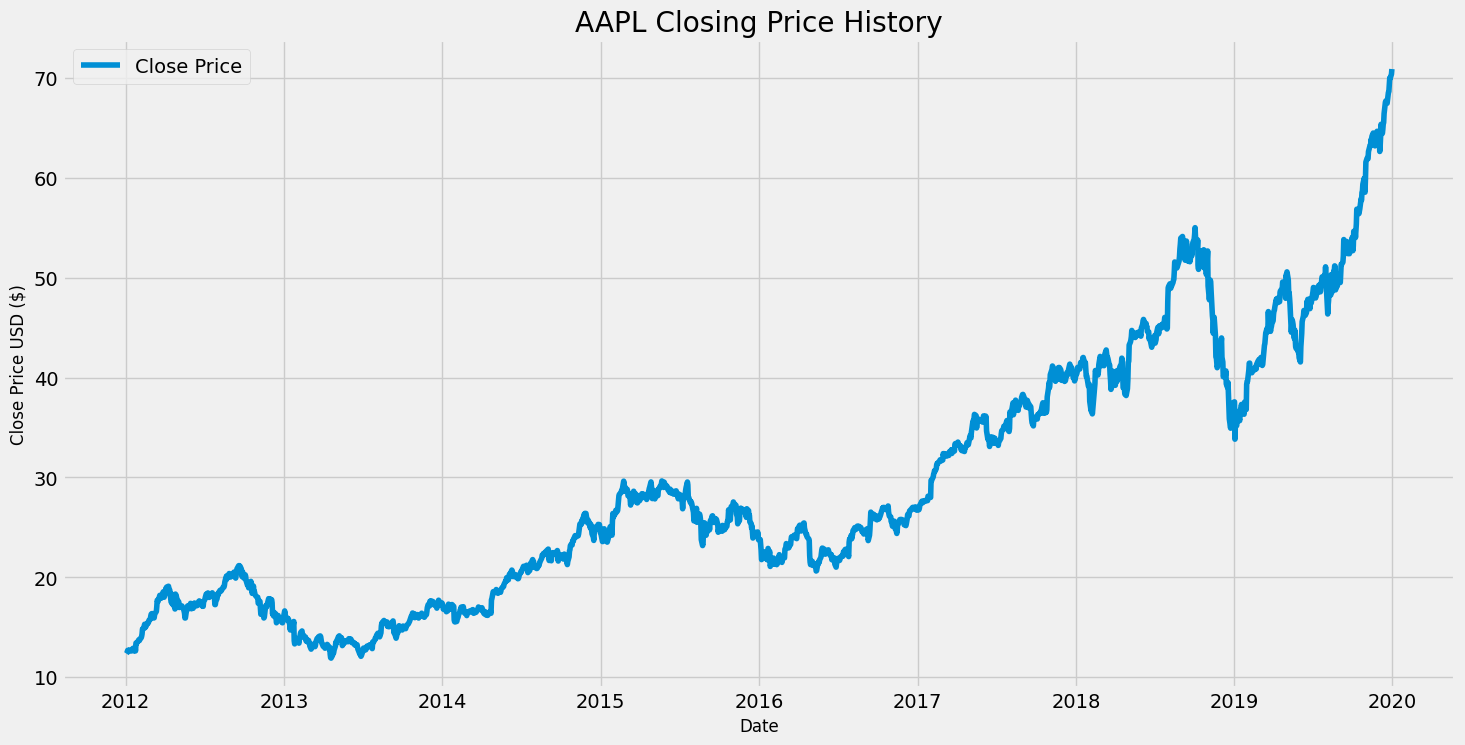

In [6]:
# Extract the Close price for AAPL
close_prices = data[('Close', 'AAPL')]

plt.figure(figsize=(16,8))
plt.title("AAPL Closing Price History")
plt.plot(close_prices, label="Close Price")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price USD ($)", fontsize=12)
plt.legend()
plt.show()

In [7]:
#Get the number of rows to train the model on   
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1610

In [8]:
#Scale the data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select Close price only
close_data = data[('Close', 'AAPL')].values.reshape(-1, 1)

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform
scaled_data = scaler.fit_transform(close_data)

print("Scaled shape:", scaled_data.shape)
print("First 5 scaled values:", scaled_data[:5])

Scaled shape: (2012, 1)
First 5 scaled values: [[0.00759646]
 [0.00872052]
 [0.01105494]
 [0.01327764]
 [0.01293691]]


In [9]:
#Create the training data set
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train
#initialize as lists
x_train = []
y_train = []
for i in range(60, len(train_data)):
    # collect 60 previous values for X
    x_train.append(train_data[i-60:i, 0]) 
    # collect the next value as label
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# reshape into 3D for LSTM (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train)
print(y_train)
print()

x_train shape: (1550, 60, 1)
y_train shape: (1550,)
[[[0.00759646]
  [0.00872052]
  [0.01105494]
  ...
  [0.10715717]
  [0.11097189]
  [0.1125689 ]]

 [[0.00872052]
  [0.01105494]
  [0.01327764]
  ...
  [0.11097189]
  [0.1125689 ]
  [0.10862211]]

 [[0.01105494]
  [0.01327764]
  [0.01293691]
  ...
  [0.1125689 ]
  [0.10862211]
  [0.10337844]]

 ...

 [[0.50982481]
  [0.50874814]
  [0.49630621]
  ...
  [0.54427316]
  [0.54955751]
  [0.54767606]]

 [[0.50874814]
  [0.49630621]
  [0.50113162]
  ...
  [0.54955751]
  [0.54767606]
  [0.5524797 ]]

 [[0.49630621]
  [0.50113162]
  [0.5035639 ]
  ...
  [0.54767606]
  [0.5524797 ]
  [0.55163892]]]
[0.10862211 0.10337844 0.11308262 ... 0.5524797  0.55163892 0.55336047]



In [10]:
#convert the x_tran and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#reshape the data
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1550, 60, 1)

In [12]:
#Build the LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\byron\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Now you can save it
model.save("lstm_model.h5")

In [14]:
#complile model
model.compile(optimizer='adam' ,loss='mean_squared_error')

In [15]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1 )

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 8.5532e-04


In [16]:
model.save("lstm_model.h5")

In [17]:
#Create the testing data set
#Create a new array containing scaled values form index 1551 - 2051
test_data = scaled_data[training_data_len - 60:, :]
#Create the data set X_test and y_test
x_test = []
y_test = []


for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [18]:
#Convert the data into a numpy arra
x_test  = np.array(x_test)

In [19]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [20]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 49.01575845106095


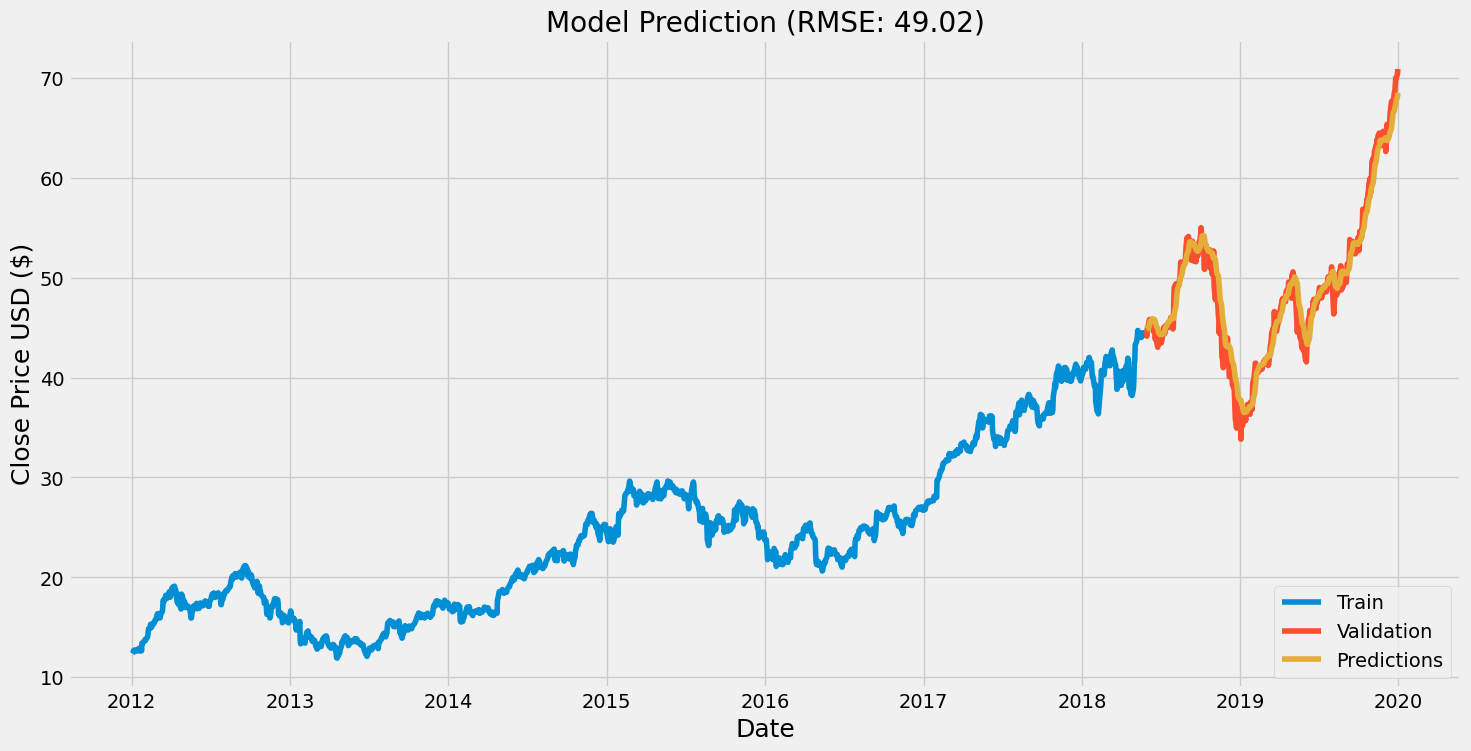

In [21]:
import matplotlib.pyplot as plt

# Split train and valid again (make sure they exist in your code before this step)
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Plotting
plt.figure(figsize=(16,8))
plt.title(f"Model Prediction (RMSE: {rmse:.2f})")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)

# Plot train close prices
plt.plot(train[('Close','AAPL')], label='Train')

# Plot validation close prices
plt.plot(valid[('Close','AAPL')], label='Validation')

# Plot predictions
plt.plot(valid['Predictions'], label='Predictions')

plt.legend(loc="lower right")

In [22]:
#show the valid and predicted price
valid

Price,Close,High,Low,Open,Volume,Predictions
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-05-29,44.397438,44.598279,44.154068,44.326556,90056400,44.903042
2018-05-30,44.302921,44.421062,44.132798,44.354904,74762000,44.931099
2018-05-31,44.154072,44.475416,43.981587,44.236772,109931200,44.939404
2018-06-01,44.950344,44.955067,44.362000,44.418709,93770000,44.921803
2018-06-04,45.326023,45.701711,45.212609,45.281129,105064800,44.975349
...,...,...,...,...,...,...
2019-12-24,68.654976,68.804720,68.328939,68.756415,48478800,67.058716
2019-12-26,70.017128,70.034036,68.758846,68.787826,93121200,67.343277


In [23]:
#Get the quote
from keras.models import load_model
apple_quote = yf.download("AAPL", start="2012-01-01", end="2020-01-01")
#Create a new dataframe
new_df = apple_quote['Close']['AAPL'].to_frame()
#Get the last 60 days and conver df to array
last_60_days = new_df.tail(60).values

#scale the daa to be between 0 and 1
# ✅ Fit the scaler on the entire 'Close' column
scaled_data = scaler.fit_transform(new_df.values)
last_60_days_scaled = scaler.transform(last_60_days)
#Create a list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert X est to numpy arra
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
#Get the predicted price
model = load_model('lstm_model.h5')
pred_price = model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price) 
print(pred_price)

C:\Users\byron\AppData\Local\Temp\ipykernel_10336\1199648314.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote = yf.download("AAPL", start="2012-01-01", end="2020-01-01")
[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
[[68.935165]]


In [25]:
#Get the quote
apple_quote = yf.download("AAPL", start="2020-12-18", end="2020-12-20")
print(apple_quote['Close'])

C:\Users\byron\AppData\Local\Temp\ipykernel_10336\2507455440.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote = yf.download("AAPL", start="2020-12-18", end="2020-12-20")
[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2020-12-18  123.416992
